In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/"

else:
    # Define path del proyecto
    Ruta            = ""

In [3]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Dataset url
url = Ruta + "/content/drive/MyDrive/R16/iris.csv"

# Load the dataset
dataset = pd.read_csv(url )

In [4]:
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset = dataset.rename(columns={"5.1": "Sepal Length"})
dataset = dataset.rename(columns={"3.5": "Sepal Width"})
dataset = dataset.rename(columns={"1.4": "Petal Length"})
dataset = dataset.rename(columns={"0.2": "Petal Width"})
dataset = dataset.rename(columns={"Iris-setosa": "Type"})
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
# Drop rows with NaN values if existing
dataset.dropna()

# Print the new shape
print(dataset.shape)

(149, 5)


<Figure size 1200x800 with 0 Axes>

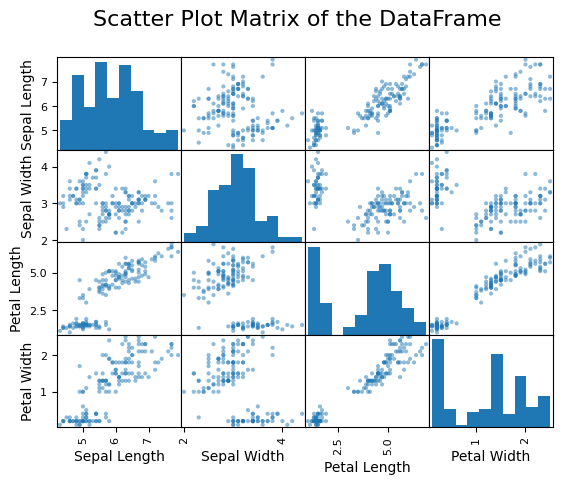

In [9]:
plt.figure(figsize=(12, 8))
pd.plotting.scatter_matrix(dataset, alpha=0.5, diagonal='hist')
plt.suptitle('Scatter Plot Matrix of the DataFrame', fontsize=16)
plt.show()

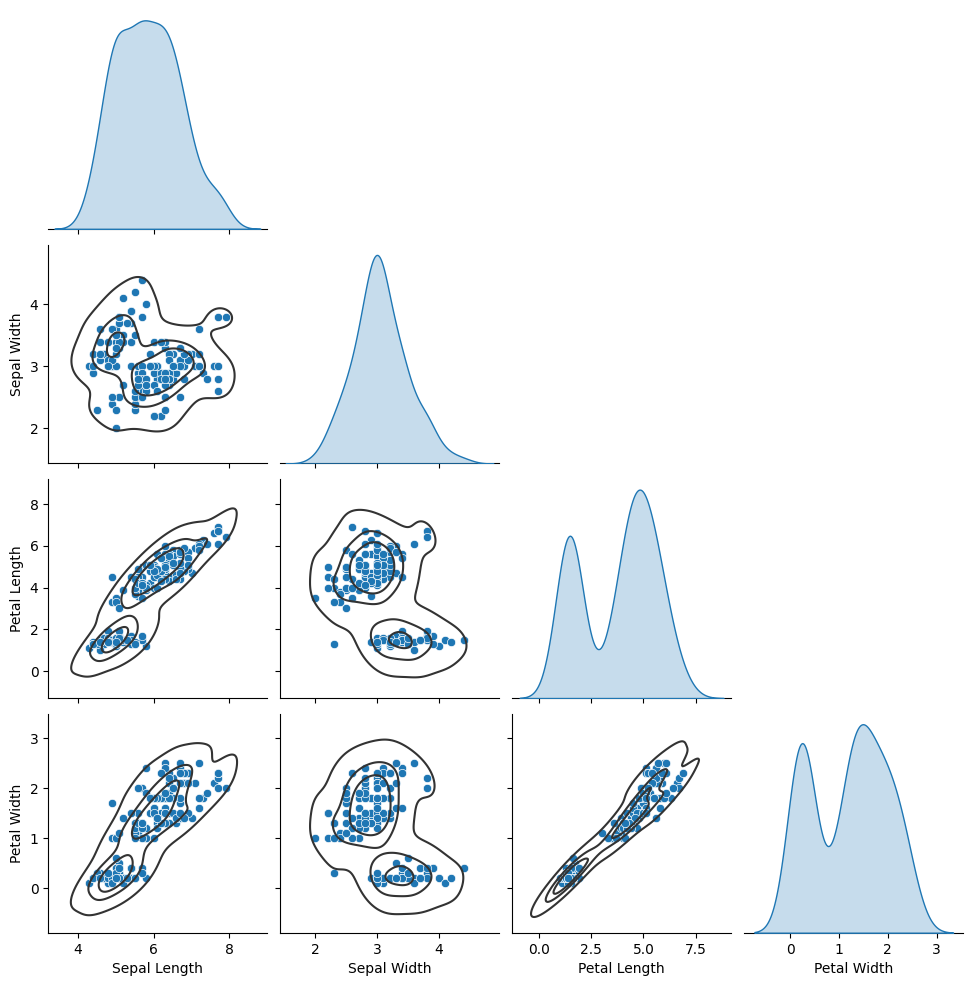

In [7]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(dataset, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [13]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#yestimated = km.fit_predict(dataset)
yestimatedSepal = km.fit_predict(dataset[['Sepal Length','Sepal Width']] )
yestimatedPetal = km.fit_predict(dataset[['Petal Length','Petal Width']] )

# Print estimated cluster of each point in the dataset
yestimatedSepal
yestimatedPetal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [14]:
# Add a new column to the dataset with the cluster information
dataset['yestimatedSepal'] = yestimatedSepal
dataset['yestimatedPetal'] = yestimatedSepal


dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type,yestimatedSepal,yestimatedPetal
0,4.9,3.0,1.4,0.2,Iris-setosa,1,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1,1
...,...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,2,2
145,6.3,2.5,5.0,1.9,Iris-virginica,0,2
146,6.5,3.0,5.2,2.0,Iris-virginica,2,2
147,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [17]:
# Print the Labels/Names of the existing clusters
dataset.yestimatedSepal.unique()
dataset.yestimatedPetal.unique()

array([1, 0, 2], dtype=int32)

In [18]:
# Cluster centroides
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.46326531, 0.24693878],
       [5.59583333, 2.0375    ]])

In [19]:
# Sum of squared error (sse) of the final model
km.inertia_

31.36527734170591

In [20]:
# The number of iterations required to converge
km.n_iter_

2

In [21]:
# Get a dataframe with the data of each clsuter
df0 = dataset[dataset.yestimatedSepal==0]
df1 = dataset[dataset.yestimatedSepal==1]
df2 = dataset[dataset.yestimatedSepal==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 53
Number of points in clusters 1: 50
Number of points in clusters 02: 46
Total Number of points in the clusters: 149


In [22]:
# Get a dataframe with the data of each clsuter
df0 = dataset[dataset.yestimatedPetal==0]
df1 = dataset[dataset.yestimatedPetal==1]
df2 = dataset[dataset.yestimatedPetal==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 52
Number of points in clusters 1: 49
Number of points in clusters 02: 48
Total Number of points in the clusters: 149


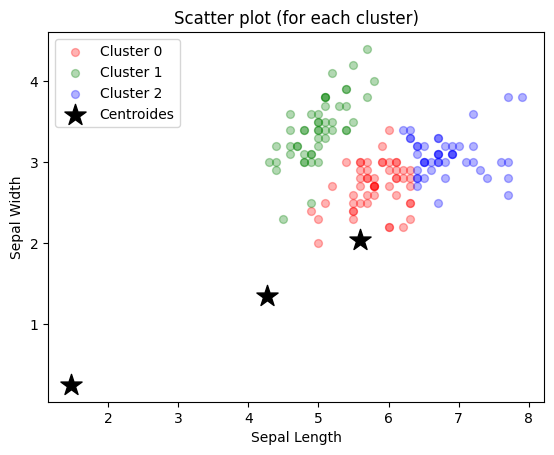

In [26]:
# Get a dataframe with the data of each clsuter
df1 = dataset[dataset.yestimatedSepal==0]
df2 = dataset[dataset.yestimatedSepal==1]
df3 = dataset[dataset.yestimatedSepal==2]

# Scatter plot of each cluster
plt.scatter(df1['Sepal Length'], df1['Sepal Width'], label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2['Sepal Length'], df2['Sepal Width'], label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3['Sepal Length'], df3['Sepal Width'], label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

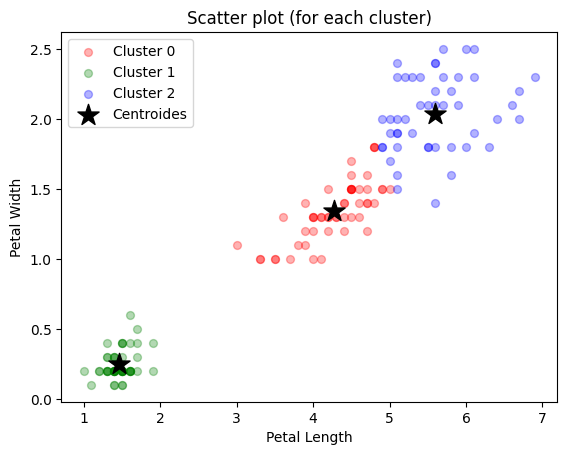

In [27]:
# Get a dataframe with the data of each clsuter
df1 = dataset[dataset.yestimatedPetal==0]
df2 = dataset[dataset.yestimatedPetal==1]
df3 = dataset[dataset.yestimatedPetal==2]

# Scatter plot of each cluster
plt.scatter(df1['Petal Length'], df1['Petal Width'], label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2['Petal Length'], df2['Petal Width'], label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3['Petal Length'], df3['Petal Width'], label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [28]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Sepal Length','Sepal Width']])
    # Save sse for each k
    sse.append(km.inertia_)

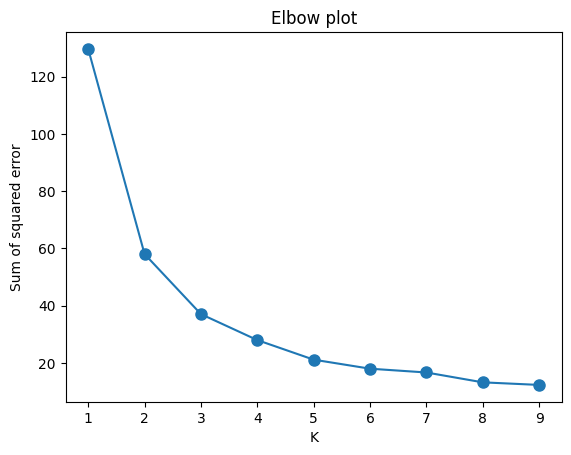

In [29]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [30]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal Length','Petal Width']])
    # Save sse for each k
    sse.append(km.inertia_)

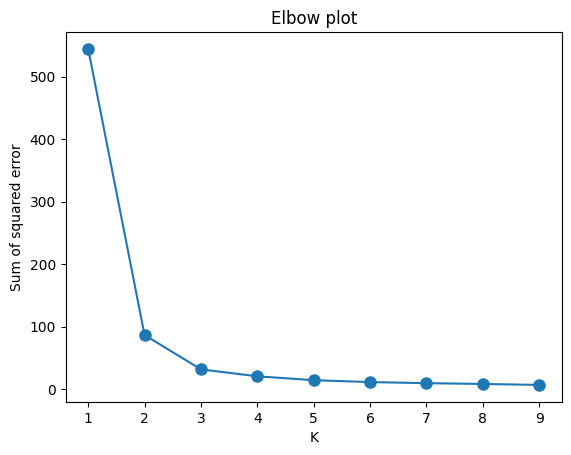

In [31]:
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

The activity was made doing two different clusters: the petal data and the sepal data. Based on the evidence found from both k-means clustering jobs. Below, I did an SSD analysis for both groups and found out that the petal data cluster has lower inertia, which means that that clustering provides better grouping.

In [45]:

pair1_features = ['Sepal Length', 'Sepal Width']


num_clusters = 3


kmeans_pair1 = KMeans(n_clusters=num_clusters)
kmeans_pair1.fit(dataset[pair1_features])



ssd_pair1 = kmeans_pair1.inertia_


ssd_pair1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37.036396005210584

In [46]:
pair2_features = ['Petal Length', 'Petal Width']
num_clusters = 3

kmeans_pair2 = KMeans(n_clusters=num_clusters)
kmeans_pair2.fit(dataset[pair2_features])

ssd_pair2 = kmeans_pair2.inertia_

ssd_pair2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31.36527734170591